In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from nnpde2diff1d import NNPDE2DIFF1D
from pde2diff1d import PDE2DIFF1D

In [2]:
%%javascript
MathJax.Hub.Config({
      TeX: { equationNumbers: { autoNumber: "AMS" } }
    });MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);
MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);

<IPython.core.display.Javascript object>

## Description

This 1-D diffusion problem starts with a linear profile in x of slope -1.

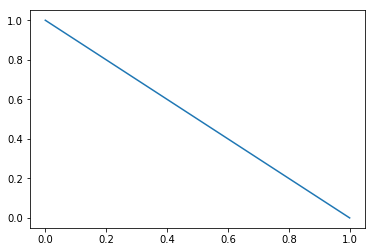

In [3]:
g0f = lambda x: 1 - x
x = np.linspace(0, 1, 101)
plt.plot(x, g0f(x));

With this starting profile, the value at the $x=0$ boundary is then linearly decreased from $1$ to $0$ in unit time.

## Create the training data.

In [4]:
nx = nt = 11
xt = np.linspace(0, 1, nx)
tt = np.linspace(0, 1, nt)
x_train = np.array(list(zip(np.tile(xt, nt),np.repeat(tt, nx))))

## Read the differential equation and create the neural net.

In [5]:
deq = PDE2DIFF1D('diff1d_decrease')

In [6]:
net = NNPDE2DIFF1D(deq)

## Train the neural net.

In [7]:
%timeit -n 1 -r 1 net.train(x_train, trainalg='L-BFGS-B')

Calling self.train_minimize().
8.03 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [8]:
print(net)

NNPDEDIFF1D:
w = [[-0.42906108  0.49652351 -0.19236879  0.60638045  0.6510911  -0.78549737
  -0.04224742  0.4751532  -0.71634892 -0.19710876]
 [-0.54144929 -0.65714868 -0.57765485 -0.79767242  0.43535723  0.38250962
   0.41035114 -0.61766509 -0.86226749 -0.96740583]]
u = [ 0.27928926 -0.46632842  0.2340825   0.34726812 -0.3981767   0.55158815
  0.71866332 -0.73644135 -0.47932273 -0.92374946]
v = [ 1.20843817  0.15492478  0.136707    1.25499583 -1.08079866  0.26015708
 -0.88835884  0.17156635  1.07159909  0.03720873]


## Compute the trained solution.

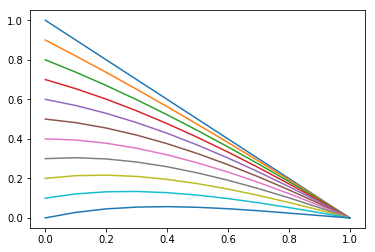

In [9]:
Yt = net.run(x_train).reshape(nx, nt)
for i in range(nt):
    plt.plot(xt, Yt[i])

## Compute the analytical solution.

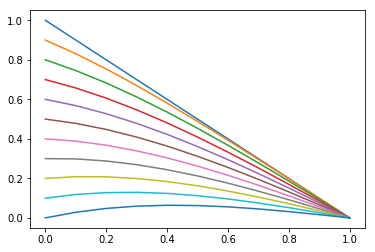

In [10]:
n = nx*nt
Ya = np.zeros(n)
for i in range(n):
    Ya[i] = deq.Yaf(x_train[i])
Ya = Ya.reshape((nx, nt))
for i in range(nt):
    plt.plot(xt, Ya[i])

## Compute the error.

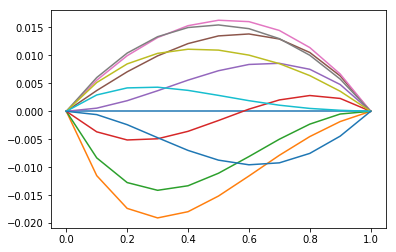

In [11]:
Y_err = Yt - Ya
for i in range(nt):
    plt.plot(xt, Y_err[i])